# ENSF 611 - Project

**Project:** Kaggle's Titanic Machine Learning Competition</br>
**Author:** Aron Saengchan</br>
**Date:** December 6, 2021

## Overview

Write text here...

## 1. Data Handling

### 1.1 Importing the Data

To begin we import the data using the Titanic dataset provided by Kaggle. The train and test data are located in the `data` folder. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the provided training dataset
data = pd.read_csv("./data/train.csv")

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1.2 Arranging the Data

The feature and target matrices need to be separated. In this case, the the `Survived` columns tell us whether each passenger survived or not, so we must extract it from the DataFrame.

In [5]:
# Drop the 'Survived' column from the DataFrame
X_train = data
X_train = X_train.drop('Survived', axis=1)

X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Extract the 'Survived' column from the DataFrame
y_train = data['Survived']

y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 2. Analyzing the Data

### 2.1 Training Features

According to [Kaggle](https://www.kaggle.com/c/titanic/data), each column represents the following:

| Variable   | Definition                        | Key                                            |
| ---------- | --------------------------------- | ---------------------------------------------- |
| `Pclass`   | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| `Sex`      | Sex                               |                                                |
| `Age`      | Age in years                      |                                                |
| `Sibsp`    | Number of siblings/spouses aboard |                                                |
| `Parch`    | Number of parents/children aboard |                                                |
| `Ticket`   | Ticket number                     |                                                |
| `Fare`     | Passenger fare                    |                                                |
| `Cabin`    | Cabin number                      |                                                |
| `Embarked` | Port of embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

We can view information about the values in each column of the data. This will help us observe each of the data types and also in determining which columns may need adjusting. In our case, `Age`, `Cabin`, and `Embarked` contain some *null* values. In addition, we our feature types consist of six numerical and five string features.

In [7]:
# Print the information about each column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


We can divide these columns into either categorical, continuous, or mixed features:
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`
- Continuous: `Age`, `Fare`, `Sibsp`, `Parch`
- Mixed: `Name`, `Ticket`, `Cabin` 

### 2.2 Data Values

The distribution of features of each column distinction can also help used determine how representative the training dataset is of the actual problem domain.

In [8]:
# Distribution of features for the training data
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this, we can gain some early insights on the numerical features:

- Most passengers belonged to second or third class
- Many of the passengers were in their 20s or 30s, with fewer elderly passengers (< 1%)
- Nearly 30% of the passengers had siblings and/or spouse aboard
- Most passengers (> 75%) did not travel with parents or children 
- Fares varied significantly

In [9]:
X_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Keefe, Mr. Arthur",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Likewise, with the categorical features, we can identify the following:

- Names were unique across the dataset
- Sex comprised of 65% male and 35% female passengers
- Cabin values have several duplicates across samples, assuming several passengers shared a cabin
- Southampton (S) port was used by most passengers
- Tickets had high ratio of duplicate values

### 2.3 Data Visualization

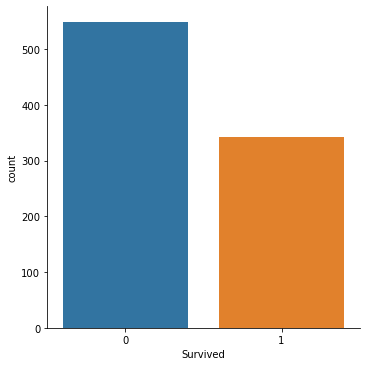

In [43]:
sns.catplot(x='Survived', data=data, kind='count');

In [44]:
age_hist = sns.FacetGrid(data, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20);

TypeError: __init__() got an unexpected keyword argument 'normalize'

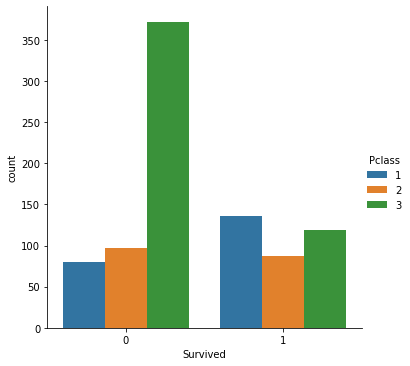

In [34]:
sns.catplot(x='Survived', data=data, kind='count', hue='Pclass');

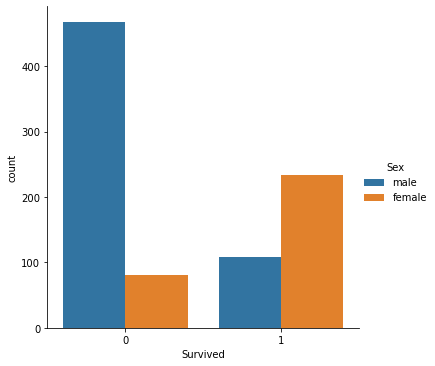

In [41]:
sns.catplot(x='Survived',data=data,kind='count',hue='Sex')

1. Column transformer (encoding and scaling)
2. Pipeline - takes in the CT and model (use diagram feature)
3. Grid search using cross validation
4. Obtain and compare scores